In [1]:

%matplotlib widget
import matplotlib.pyplot as plt
from polygonal_roadmaps import polygonal_roadmap
import networkx as nx
import numpy as np
import logging
import pandas as pd
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import tempfile

# logging.getLogger().setLevel(logging.INFO)

%load_ext snakeviz

In [2]:
from plotnine import *
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

SCEN = 'even/maze-32-32-4-even-1.scen'

In [3]:
polygonal_roadmap.MapfInfoEnvironment(SCEN).get_obstacle_df()

,x,y,status
0,0,0,free
1,0,1,free
2,0,2,free
3,0,3,free
4,0,4,free
...,...,...,...
1019,31,27,occupied
1020,31,28,occupied
1021,31,29,occupied
1022,31,30,free


In [4]:
from polygonal_roadmaps import utils

data = []
data += [utils.load_results('CBS.yml', 'maze_even.yml')]
# profiles += [utils.load_results('CBS_maze_random.yml')[2]]
profiles = [d[1] for d in data]


df_profiles = pd.concat(profiles, ignore_index=True)
df_profiles.ncalls = df_profiles.ncalls.astype(int)
df_history = utils.convert_history_to_df(data[0][0][SCEN].history)
df_obstacles = polygonal_roadmap.MapfInfoEnvironment(SCEN).get_obstacle_df()

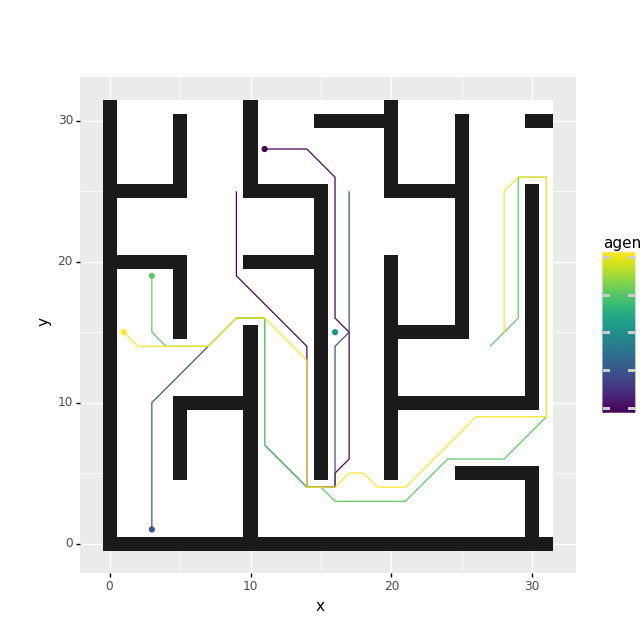

<ggplot: (283328895)>

In [5]:
def plot_timestep(t, df, df_obstacles):
    return ggplot(df_obstacles, aes(x="x", y="y")) + geom_tile(aes(fill="status")) + guides(fill=None) + scale_fill_gray(start=0.1, end=1) + geom_point(df.loc[df.t.eq(t)], aes(x="x", y="y", color="agent")) + geom_path(df, aes(x="x", y="y", color="agent",group="agent")) + coord_fixed(ratio=1)
plot_timestep(0, df_history, df_obstacles)

In [6]:
# It is better to use a generator instead of a list
plots = (plot_timestep(k, df_history, df_obstacles) for k in df_history.t.unique())
ani = PlotnineAnimation(plots, interval=200, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

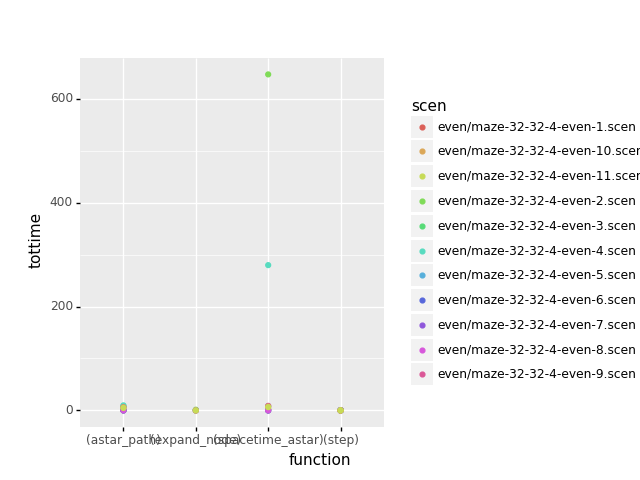

<ggplot: (344489768)>

In [7]:
ggplot(df_profiles, aes(x='function', y='tottime', color='scen')) + geom_point() + theme(subplots_adjust={'right': 0.6})
# plt.tight_layout()